<a href="https://colab.research.google.com/github/sathish142/Alpha-AI_Task/blob/main/notebooks/Task-2-Image_Segmentation_and_Crowd_Density_Estimator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# This notebook created and excuted in Colab

#### Install kaggle package for download kaggle dataset

In [1]:
! pip install kaggle

In [2]:
! mkdir ~/.kaggle

In [3]:
# Import the kaggle downloaded API json file
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

In [4]:
# Downloading the shanhaitect from kaggle dataset
! kaggle datasets download  tthien/shanghaitech

 96% 321M/333M [00:08<00:00, 37.6MB/s]
100% 333M/333M [00:08<00:00, 39.5MB/s]


In [ ]:
!unzip shanghaitech.zip

#### Colne the CSRNet-PyTorch base code

In [6]:
!git clone https://github.com/leeyeehoo/CSRNet-pytorch.git

Cloning into 'CSRNet-pytorch'...
remote: Enumerating objects: 86, done.
remote: Total 86 (delta 0), reused 0 (delta 0), pack-reused 86
Unpacking objects: 100% (86/86), done.


##### Change the below code in respective files because of version
1. In model.py, change xrange in line 18 to range
2. Change line 19 in model.py with: list(self.frontend.state_dict().items())[i][1].data[:] = list(mod.state_dict().items())[i][1].data[:]
3. In image.py, replace ground_truth with ground-truth

#### Import packages

In [7]:
# Change location to code base location
import os
os.chdir('/content/CSRNet-pytorch')

In [8]:
# importing libraries
import h5py
import scipy.io as io
import PIL.Image as Image
import numpy as np
import os
import glob
from matplotlib import pyplot as plt
from scipy.ndimage.filters import gaussian_filter
import scipy
import json
from matplotlib import cm as CM
from image import *
from model import CSRNet
import torch
from tqdm import tqdm
from scipy import spatial
from torchvision import datasets, transforms
%matplotlib inline

In [9]:
# Transform for the image files
transform=transforms.Compose([
                      transforms.ToTensor(),transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                    std=[0.229, 0.224, 0.225]),
                  ])

#### Load train and test image from dataset to view

In [10]:
root = '/content/ShanghaiTech/'
part_A_train = os.path.join(root,'part_A/train_data','images')
part_A_test = os.path.join(root,'part_A/test_data','images')
# part_B_train = os.path.join(root,'part_B/train_data','images')
# part_B_test = os.path.join(root,'part_B/test_data','images')
path_sets = [part_A_train,part_A_test]

In [11]:
img_paths = []
for path in path_sets:
    for img_path in glob.glob(os.path.join(path, '*.jpg')):
        img_paths.append(img_path)

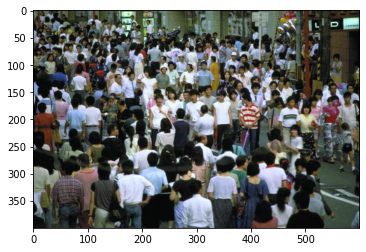

In [12]:
plt.imshow(Image.open(img_paths[0]))

#### Use CSRNet() model and load pre-trained mode weights

In [13]:
model = CSRNet()

Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/hub/checkpoints/vgg16-397923af.pth


  0%|          | 0.00/528M [00:00<?, ?B/s]

In [14]:
#defining the model
model = model.cuda()

In [15]:
!gdown --id 1KY11yLorynba14Sg7whFOfVeh2ja02wm

Downloading...
From: https://drive.google.com/uc?id=1KY11yLorynba14Sg7whFOfVeh2ja02wm
To: /content/CSRNet-pytorch/0model_best.pth.tar
130MB [00:00, 165MB/s]


In [16]:
# Move model to correct folder
! mkdir '/content/Model'
! mv '/content/CSRNet-pytorch/0model_best.pth.tar' /content/Model/.

In [17]:
#loading the trained weights
checkpoint = torch.load('/content/Model/0model_best.pth.tar')
model.load_state_dict(checkpoint['state_dict'])

<All keys matched successfully>

#### check the predictions on a single image from

Predicted Count :  60


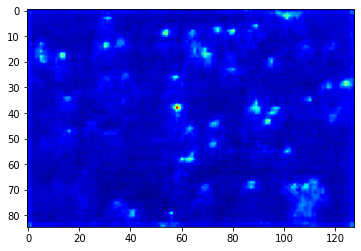

Original Image


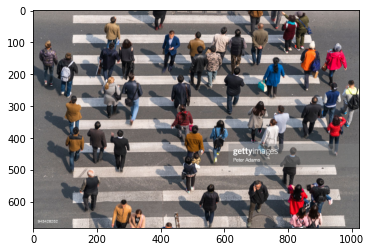

In [22]:
from matplotlib import cm as c
input_image = '/content/gettyimages-943428252-1024x1024.jpg'
img = transform(Image.open(input_image).convert('RGB')).cuda()

output = model(img.unsqueeze(0))
print("Predicted Count : ",int(output.detach().cpu().sum().numpy()))
temp = np.asarray(output.detach().cpu().reshape(output.detach().cpu().shape[2],output.detach().cpu().shape[3]))
plt.imshow(temp,cmap = c.jet)
plt.show()

print("Original Image")
plt.imshow(plt.imread(input_image))
plt.show()